### Scattering Phase Function 
by Velibor Pejcic (velibor@uni-bonn.de) from GP/BC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import atradlib as ar

(500,) (0.07861243455823291+0j)
CPU times: user 13.4 s, sys: 0 ns, total: 13.4 s
Wall time: 13.4 s


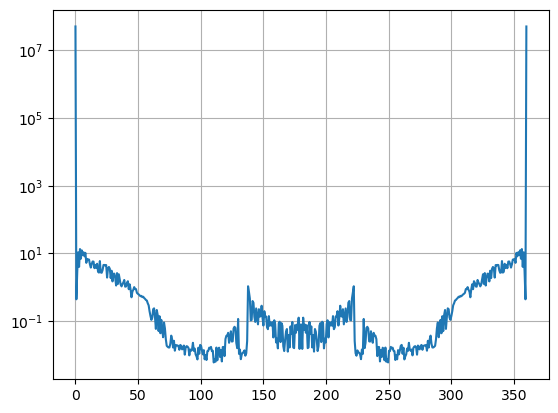

In [3]:
%%time

nang=500
angmin=0
angmax=360
dang=(angmax-angmin)/(nang-1)

ang = np.arange(angmin, angmax+dang, dang)

# CHI for spec wave length
chi = 10000

# scattering direction
mu = np.cos(ang*np.pi/180)
m = 1.33 + 0.00j #m=complex(real=1.33,imaginary=0.0)


p = ar.phase_func(m,chi,mu, nang)
plt.semilogy(ang,p.real)

plt.grid()
print (p.shape, p[249])

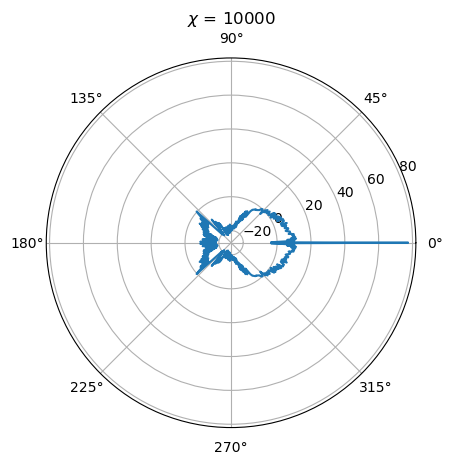

In [4]:
# Darstellungs Idee
theta, r = ang, p.real
ax = plt.subplot(111, projection='polar')
#ax.plot(np.deg2rad(theta),r)
#ax.scatter(0,0, s=100)
#ax.semilogy(theta,r)
ax.plot(np.deg2rad(theta),10*np.log10(r))
ax.set_title(r"$\chi$ = "+str(chi))
#ax.set_rmax(0.1)
plt.show()

0.039983906500233736
[1.23645676]


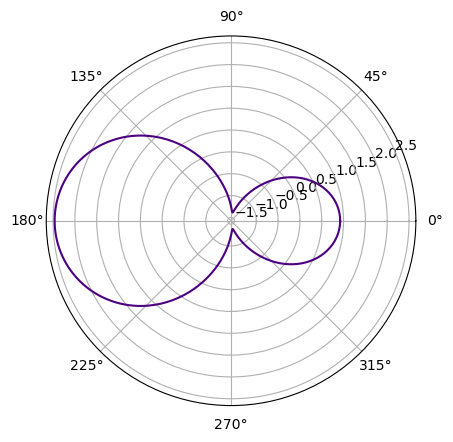

In [5]:
nang=360
angmin=0
angmax=360
dang=(angmax-angmin)/(nang-1)

ang = np.arange(angmin, angmax+dang, dang)

ax = plt.subplot(111, projection='polar')

drop_r = 0.07 # cm
waw = 11 #cm 

chi = ar.size_para(drop_r,waw)

print(chi)
col = 'indigo'


mu = np.cos(ang*np.pi/180)
m = 78.3-12.1j # bei 20°C

p = ar.phase_func(m,chi,mu, nang)
theta, r = ang, p.real
ax.plot(np.deg2rad(theta),10*np.log10(r), color=col, label=r"$\chi$="+str(chi))
print(r[theta==theta[0]])



ka-band: [0.07306029 4.38361766]
ku-band: [0.01963495 1.17809725]


NameError: name 'phase_func' is not defined

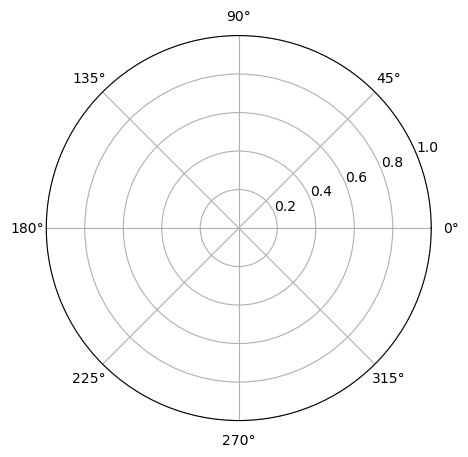

In [6]:
nang=360*2
angmin=0
angmax=360
dang=(angmax-angmin)/(nang-1)

ang = np.arange(angmin, angmax+dang, dang)
mu = np.cos(ang*np.pi/180)

D1 = 0.01
D2 = 0.6

###### Ka-band ########
# Drop RADIUS
drop_r=np.array([D1, D2]) 
# Wavelnegth
waw = np.array([0.86, 0.86]) #Sband: 11 #cm
# Mie Parameter
chi = ar.size_para(drop_r,waw)

# Refrection index
m = np.sqrt(np.array([19.2 -29.2j, 19.2 -29.2j]))

print('ka-band:', chi)

###### Ku-band ########
# Drop RADIUS
drop_r2=np.array([D1, D2]) 
# Wavelnegth
waw2 = np.array([3.2, 3.2]) #Sband: 11 #cm
# Mie Parameter
chi2 = ar.size_para(drop_r2,waw2)
# Refrection index
m2 = np.sqrt(np.array([62.1-32.0j, 62.1-32.0j]))

print('ku-band:', chi2)


col = ['blue', 'black', 'indigo', 'green']


plt.figure(figsize=(12,5))
for i in range(len(drop_r)):
    ax = plt.subplot(121, projection='polar')
    p2 = ar.phase_func(m2[i],chi2[i], mu, nang)
    theta, r = ang, p2.real
    #r = r/np.nanmax(2*np.pi)
    ax.plot(np.deg2rad(theta),10*np.log10(r), color=col[i], label=r"$D$="+str(2*drop_r[i])+'cm')
    ax.set_title("Ku-band", va='bottom', fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    ax = plt.subplot(122, projection='polar')
    p = ar.phase_func(m[i],chi[i], mu, nang)
    theta, r = ang, p.real
    #r = r/np.nanmax(2*np.pi)
    ax.plot(np.deg2rad(theta),10*np.log10(r), color=col[i], label=r"$D$="+str(2*drop_r[i])+'cm')
    ax.set_title("Ka-band", va='bottom', fontsize=13)
    #print('Normalized Amplitude!!!!!!!!!!')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    
    #ax.legend(loc=l, bbox_to_anchor=(0.6,0.5))
plt.legend(bbox_to_anchor=(0.05,1.1), fontsize=13)
plt.show()

In [ ]:
nang=360*2
angmin=0
angmax=360
dang=(angmax-angmin)/(nang-1)

ang = np.arange(angmin, angmax+dang, dang)
mu = np.cos(ang*np.pi/180)

D1 = 0.01
D2 = 0.6

###### Ka-band ########
# Drop RADIUS
drop_r=np.array([D1, D2]) 
# Wavelnegth
waw = np.array([0.86, 0.86]) #Sband: 11 #cm
# Mie Parameter
chi = (2*np.pi*drop_r) / waw
# Refrection index
m = np.sqrt(np.array([19.2 -29.2j, 19.2 -29.2j]))

print('ka-band:', chi)

###### Ku-band ########
# Drop RADIUS
drop_r2=np.array([D1, D2]) 
# Wavelnegth
waw2 = np.array([3.2, 3.2]) #Sband: 11 #cm
# Mie Parameter
chi2 = (2*np.pi*drop_r2) / waw2
# Refrection index
m2 = np.sqrt(np.array([62.1-32.0j, 62.1-32.0j]))

print('ku-band:', chi2)


col = ['blue', 'black', 'indigo', 'green']


plt.figure(figsize=(12,5))
for i in range(len(drop_r)):
    ax = plt.subplot(121, projection='polar')
    p2 = ar.phase_func(m2[i],chi2[i], mu, nang)
    theta, r = ang, p2.real
    #r = r/np.nanmax(2*np.pi)
    ax.plot(np.deg2rad(theta),10*np.log10(r), color=col[i], label=r"$D$="+str(2*drop_r[i])+'cm')
    ax.set_title("Ku-band", va='bottom')
    ax.plot(np.deg2rad(theta),10*np.log10(ar.ray_phase_func(ang)), color='red', linestyle='-.', lw=3, zorder=-1)
    #ax.set_ylim(-10, 2)
    
    ax = plt.subplot(122, projection='polar')
    p = ar.phase_func(m[i],chi[i], mu, nang)
    theta, r = ang, p.real
    #r = r/np.nanmax(2*np.pi)
    ax.plot(np.deg2rad(theta),10*np.log10(r), color=col[i], label=r"$D$="+str(2*drop_r[i])+'cm')
    ax.set_title("Ka-band", va='bottom')
    ax.plot(np.deg2rad(theta),10*np.log10(ar.ray_phase_func(ang)), color='red', linestyle='-.', lw=2, zorder=-1)

    
    
plt.legend(loc='upper left')
plt.show()

In [ ]:
nang=360
angmin=0
angmax=360
dang=(angmax-angmin)/(nang-1)

ang = np.arange(angmin, angmax+dang, dang)

ax = plt.subplot(111, projection='polar')

for i, drop_r in enumerate(np.arange(0.01, 10,0.01)):
#drop_r = 3 # cm
    waw = 11 #cm 
        
    chi = ar.size_para(drop_r,waw)

    #print(chi)
    col = 'indigo'
    
    
    mu = np.cos(ang*np.pi/180)
    m = 78.3-12.1j # bei 20°C
    
    p = ar.phase_func(m,chi,mu, nang)
    theta, r = ang, p.real
    ax.plot(np.deg2rad(theta),10*np.log10(r), color=plt.cm.jet(i), label=r"$\chi$="+str(chi), lw=0.1, alpha=0.5)
    #print(r[theta==theta[0]])
    
